In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

# Imbalanced Dataset

<pre>
1. Observation of how linear models work in case of imbalanced data
2. Observation of how hyperplane is changing according to change in our learning rate.
3. Below we have created 4 random datasets which are linearly separable and having class imbalance
4. In the first dataset the ratio between positive and negative is 100 : 2, in the 2nd data its 100:20, 
in the 3rd data its 100:40 and in 4th one its 100:80
</pre>

## 1: Applying SVM

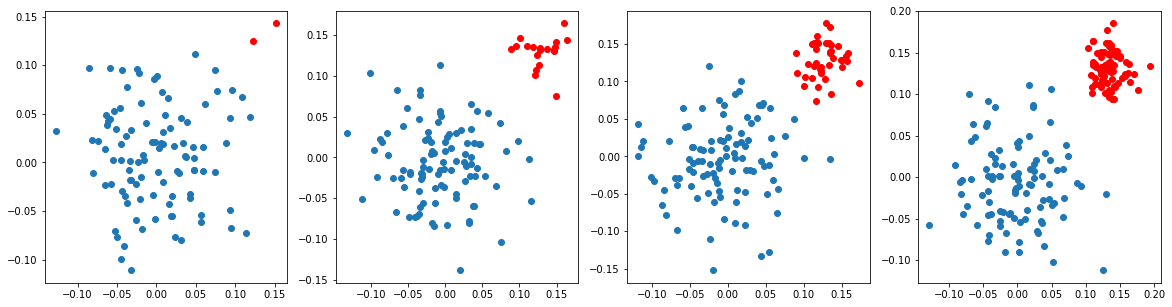

In [ ]:
# here we are creating 2d imbalanced data points
data_x = []
data_Y = []
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]

plt.figure(figsize=(20,5))

for j,i in enumerate(ratios):
    plt.subplot(1, 4, j+1)
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    data_x.append(X)
    data_Y.append(y)
    plt.scatter(X_p[:,0],X_p[:,1])
    plt.scatter(X_n[:,0],X_n[:,1],color='red')
    
plt.show()

In [ ]:
# learning rate
C = [0.001, 1, 100]

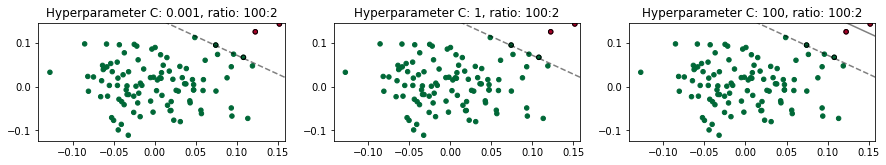

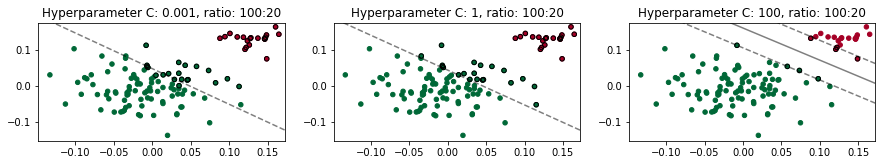

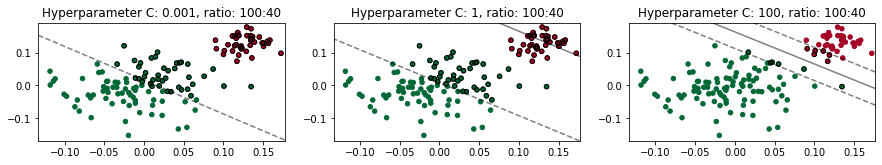

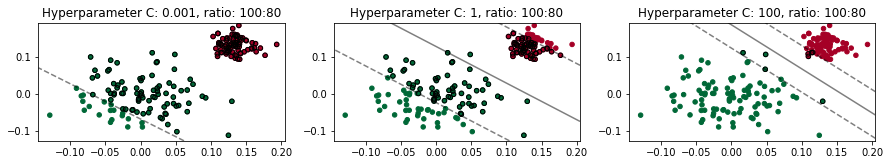

In [ ]:
for p, i in enumerate(ratios):
    plt.figure(figsize=(15,10))

    for q, j in enumerate(C):
        plt.subplot(4,3, q+1)

        # SVM classifier
        clf = SVC(C=j, kernel ='linear', random_state=42)
        clf.fit(data_x[p], data_Y[p])

        # plot scatter points and add title
        plt.title("Hyperparameter C: {}, ratio: {}:{}".format(j, i[0], i[1]))
        plt.scatter(data_x[p][:,0], data_x[p][:,1], c = data_Y[p], cmap='RdYlGn', s = 20)

        # Code source to plot decision boundary
        # code source: https://hackernoon.com/how-to-plot-a-decision-boundary-for-machine-learning-algorithms-in-python-3o1n3w07
    
        # plot decision boundary
        ax = plt.gca()
        # define bounds of the domain
        x_lim = ax.get_xlim()
        y_lim = ax.get_ylim()
        # define x and y scale
        x1grid = np.arange(x_lim[0], x_lim[1], 0.01)
        x2grid = np.arange(y_lim[0], y_lim[1], 0.01)
        # create all of the lines and rows of grid
        xx, yy = np.meshgrid(x1grid, x2grid)
        # flatten each grid to a vector
        r1, r2 = xx.flatten(), yy.flatten()
        r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
        xy = np.hstack([r1, r2])

        # Obtaining the support vectors
        # code source: https://scikit-learn.org/stable/auto_examples/svm/plot_linearsvc_support_vectors.html
        z = clf.decision_function(xy).reshape(xx.shape)

        ax.contour(xx, yy, z, colors="k", levels=[-1, 0, 1], alpha=0.5,
            linestyles=["--", "-", "--"],)

        # plot support vectors
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s = 20,
                    linewidth = 1, facecolors='none', edgecolors = 'k',)

    plt.show()

### Observation:
- **For 100:2 ratio**,
    - For **all hyperparmeters**, with increase in hyperparameter the decision line seems to come closer to the points and margin gets smaller but still is not able to classify points. The model underfits with lesser data points.
- **For 100:20 ratio**, 
    - For hyperparameter **C=0.001** and **C=1**, the model is misclassifying points and the regularization is high. The model is underfitting.
    - For hyperparameter **C=100**, the model is able to classify points well but may be prone to outliers as the margin is small and may not work well on unseen data. The model is overfitting.
- **For 100:40 ratio**, 
    - For hyperparameter **C=0.001**, the model is misclassifying points and here as well the regularization is high. The model is underfitting.
    - For hyperparameter **C=1**, the model is able to classify some points well but it still is misclassifying some points. 
    - For hyperparameter **C=100**, the model is able to classify the points well but the margin is small and may be prone to outliers. It is still better than rest of the hyperparmeters tested.
- **For 100:80 ratio**, 
    - For hyperparameter **C=0.001**, the model is misclassifying  points and is underfitting.
    - For hyperparameter **C=1**, the model is able to classify the points well and has a good margin but it has some misclassified points (outliers). This seems to be the optimal hyperparameter for this model.
    - For hyperparameter **C=100**, the model is classifying points quite well but the margin is not that big and may not work well on unseen data. The data on the one side is dense so it may be prone to outliers.

- Larger hyperparameters also seem to decrease the margin.
- Hyperparameters affect the SVM model quite a lot but with enough data points and correct hyperparameter it can classify the points well.
- With increase in hyperparameter values, regularization of the model decreases and is able to separate data points better.


## 2: Applying LR

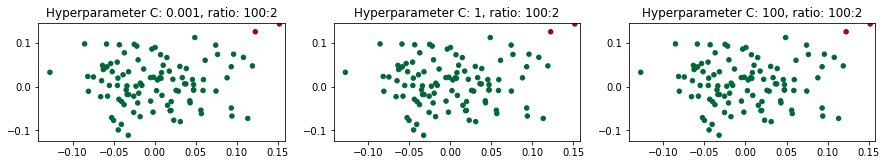

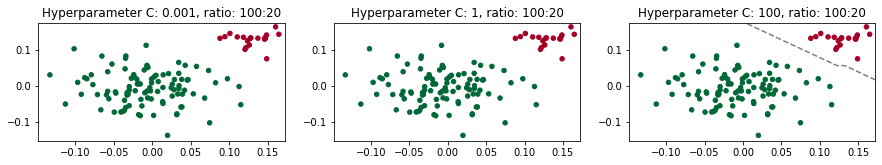

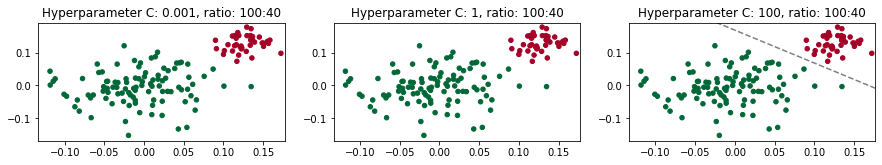

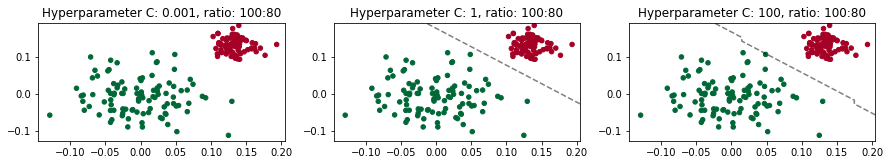

In [ ]:
for p, i in enumerate(ratios):
    plt.figure(figsize=(15, 10))
    for q, j in enumerate(C):
        plt.subplot(4, 3, q+1)

        # Logistic Regression classifier
        clf = LogisticRegression(C=j, random_state=42)
        clf.fit(data_x[p], data_Y[p])

        # plot scatter points and add title
        plt.title("Hyperparameter C: {}, ratio: {}:{}".format(j, i[0], i[1]))
        plt.scatter(data_x[p][:,0], data_x[p][:,1], c = data_Y[p], cmap='RdYlGn', s = 20)

        # Code source to plot decision boundary
        # code source: https://hackernoon.com/how-to-plot-a-decision-boundary-for-machine-learning-algorithms-in-python-3o1n3w07
    
        # plot decision boundary
        ax = plt.gca()
        # define bounds of the domain
        x_lim = ax.get_xlim()
        y_lim = ax.get_ylim()
        # define x and y scale
        x1grid = np.arange(x_lim[0], x_lim[1], 0.01)
        x2grid = np.arange(y_lim[0], y_lim[1], 0.01)
        # create all of the lines and rows of grid
        xx, yy = np.meshgrid(x1grid, x2grid)
        # flatten each grid to a vector
        r1, r2 = xx.flatten(), yy.flatten()
        r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
        xy = np.hstack([r1, r2])

        z = clf.predict(xy).reshape(xx.shape)
    
        ax.contour(xx, yy, z, colors="k", levels=[-1, 0, 1], alpha=0.5,
        linestyles=["--", "-", "--"])

    plt.show()

### Observation:
- **For 100:2 ratio**,
    - For **all hyperparameters**, the model is underfitting. It is not able to find a decision boundary.
- **For 100:20 ratio**,
    - For hyperparameter **C=0.001** and **C=1**, the model is misclassifying points and is not able to find a decision line. The model is underfitting.
    - For hyperparameter **C=100**, The model is able to classify points well but as we haven't tested it on unseen data, we cannot confirm whether the model is optimal or overfitt.
- **For 100:40 ratio**,
    - For hyperparameter **C=0.001** and **C=1**, the model is not able to classify points at all, hence, the model is underfitting.
    - For hyperparmeter **C=100**, the model seems to separate the points well but again due to lack of data we cannot confirm whether the model is optimal or overfit.
- **For 100:80 ratio**,
    - For hyperparameter **C=0.001**, the model is not able to separate data points at all, so, here as well the model is underfitting.
    - For hyperparameter **C=1** and **C=100**, the model is able to separate the points well but again as we have not tested it on unseen data we cannot confirm whether the model is optimal or overfit.

- As the hyperparameter increases the regularization decreases, with right balance between the two, LogisticRegression is able to classify data points very well.
- LogisticRegression is harder to interpret than SVM. To confirm whether a model is optimal or overfit we need to test it on unseen data.